In [1]:
from scipy.io import loadmat
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.losses import Loss
from cal_error import ExpectedCalibrationError
import time 
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.insert(1, '/home/thlarsen/ood_detection')

from helper import load_mnist_c, load_mnist_model, rgb_img_to_vec
from cal_error import ExpectedCalibrationError


In [3]:
data, labels, sev = load_mnist_c('contrast')
step = 10000
mnist_by_sev = {}
for i in range(0, data.shape[0], step): 
    mnist_by_sev[sev[i]] = [data[i:i+step], labels[i:i+step]]

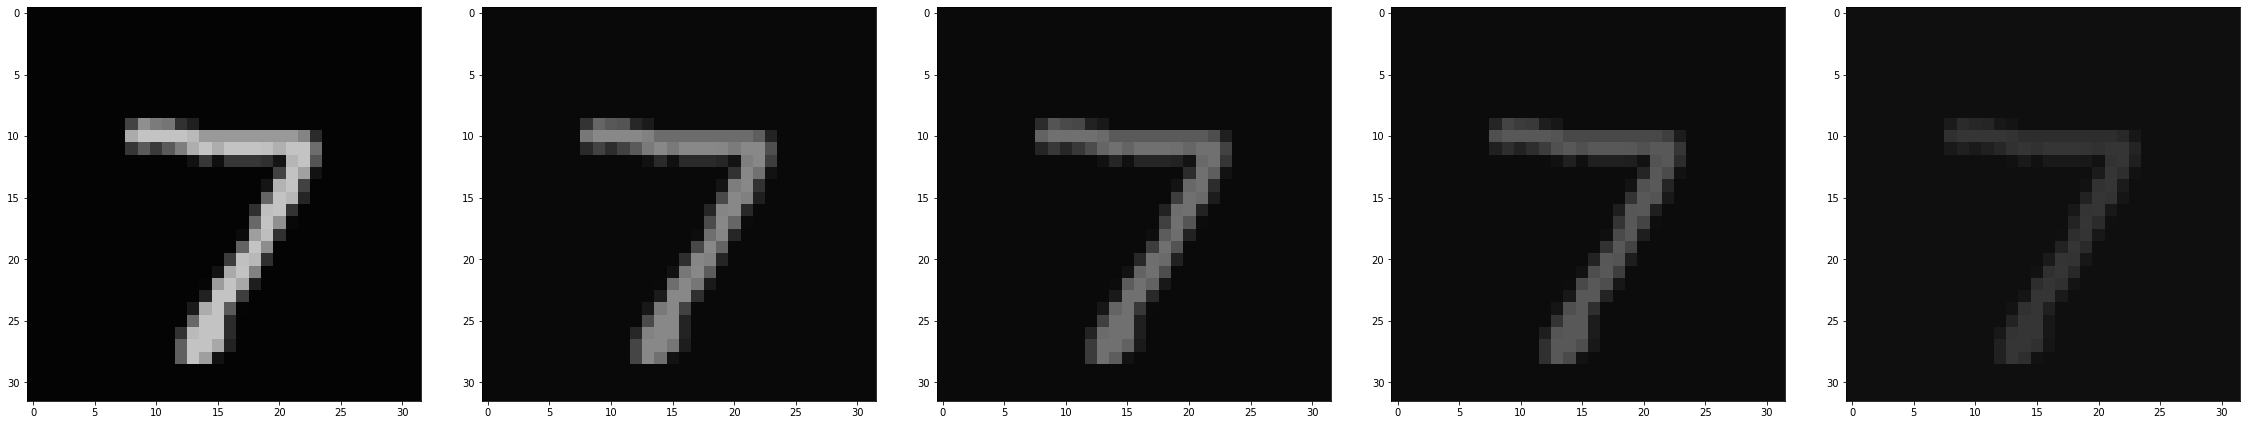

In [4]:
A=0
B=50000
x=0

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(32, 32))
fig.tight_layout(pad=3.0)

for i in range(A, A+B, 10000): 
    
#     print(f'label={labels[i]}, sev={sev[i]}')
    axes[x].imshow(data[i])
#     axes[x].title.set_text(f'sev={sev[i]}')
#     ax.set_title(f'sev={sev[i]}', fontdict={'fontsize': 15, 'fontweight': 'medium'})
#     axes.set_fontsize(20)

    x+=1
#     plt.show()
    

In [22]:
model = load_mnist_model(lr=1e-5, w=.1) 

In [23]:
acc_fn = keras.metrics.SparseCategoricalAccuracy()
ece = ExpectedCalibrationError()

In [24]:
acc = []
ece = []

acc_fn = keras.metrics.Accuracy()
ECE = ExpectedCalibrationError()

for sev in mnist_by_sev.keys(): 
    data_s, labels_s = mnist_by_sev[sev]
    data_s = rgb_img_to_vec(data_s)

    preds = model.predict(np.reshape(data_s, (-1, 1024)))
    acc.append(acc_fn(labels_s, tf.argmax(preds, axis=1)))
    ece.append(ECE.call(labels_s, preds))
    print(f" acc = {acc[-1]}")
    print(f" ece = {ece[-1]}")


 acc = 0.8091999888420105
 ece = 0.01830078475177288
 acc = 0.7718999981880188
 ece = 0.02145480178296566
 acc = 0.7317333221435547
 ece = 0.031407419592142105
 acc = 0.6804999709129333
 ece = 0.057197026908397675
 acc = 0.6073200106620789
 ece = 0.12349587678909302


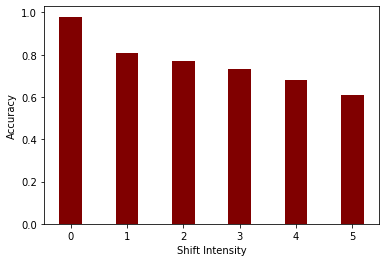

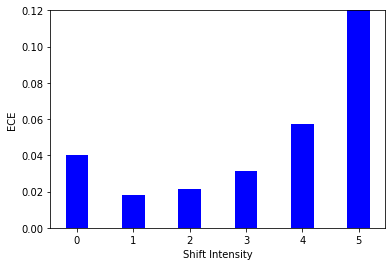

In [25]:
if len(acc) == 5:
    acc = [.98] + acc 
    ece = [.04] + ece

plt.bar(range(0, 6), acc, color ='maroon',
        width = 0.4)
 
plt.xlabel("Shift Intensity")
plt.ylabel("Accuracy")
# plt.title("Students enrolled in different courses")
plt.show()

# plot.plot(range(5), ece)
plt.bar(range(0, 6), ece, color ='blue',
        width = 0.4)
plt.xlabel("Shift Intensity")
plt.ylabel("ECE")
plt.ylim(top=0.12)

# plt.title("Students enrolled in different courses")
plt.show()

# for sev in range(5): 
    
#     print(f'label={labels[i]}, sev={sev[i]}')
#     axes[x].imshow(data[i])
#     axes[x].title.set_text(f'sev={sev[i]}')
#     ax.set_title(f'sev={sev[i]}', fontdict={'fontsize': 15, 'fontweight': 'medium'})
#     axes.set_fontsize(20)

#     x+=1
#     plt.show()